### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 


## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6


### Дисциплина: Интеллектуальный анализ данных



##### Студент:  Липатникова Марина
##### Группа:   НФИбд-02-19



## Москва 2022
***


#### Задание на лабораторную работу №6


Для закрепленного за Вами варианта лабораторной работы:

    1.	Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов. 

    2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding). Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании.

    3.	Используя метод снижения размерности данных, указанный в индивидуальном задании, определите и оставьте в наборе данных пять признаков.

    4.	Нормализуйте оставшиеся признаки набора данных методом, указанным в индивидуальном задании.

    5.	Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. При визуализации набора данных используйте три признака с наиболее высокой оценкой важности. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

    6.	Разбейте набор данных на обучающую и тестовую выборки. Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 5, определите долю верных ответов на тестовой выборке и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности.

    7. 	Постройте и обучите дополнительные базовые классификаторы, указанные в индивидуальном задании, затем постройте из классификатора дерева решений и дополнительных классификаторов комбинированный классификатор, указанный в индивидуальном задании. Оцените производительность базовых классификаторов и комбинированного классификатора по показателю, указанному в индивидуальном задании. 

    8. 	Постройте и обучите пару ансамблевых классификаторов, указанных в индивидуальном задании, и сравните их производительность по показателю, указанному в индивидуальном задании. 

    9. 	Постройте границы принятия решений ансамблевых классификаторов с визуализацией точек набора данных разных классов разными цветами. Подпишите оси и рисунок. 




# Индивидуальное задание



Лабораторная работа 6 – Вариант 11 

Glass Identification Data Set 

Название файла: glass.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Glass+Identification 

Класс: Type of glass (столбец No 11) 

Метод обработки пропущенных значений – медиана класса 

Метод нормализации признаков – стандартизация 

Алгоритм снижения размерности данных – рекурсивное исключение признаков (RFE) 

Дополнительные базовые классификаторы: 

⁃            наивный байесовский классификатор 

⁃            классификатор ближайших соседей (к-во соседей = 5) 

Комбинированный классификатор: VotingClassifier 

Ансамблевые классификаторы: RandomForestClassifier,  GradientBoostingClassifier 

Показатель качества модели – F-мера (f1) 
 

 1.	Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.

In [1]:

url = \
    "https://archive.ics.uci.edu/ml/"+\
    "machine-learning-databases/glass/glass.data"


In [2]:

import pandas as pd

data = pd.read_csv(url, header=None)

data


,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:

data.columns = ['Id_number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca',
               'Ba', 'Fe', 'Type_of_glass']
data


,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding). Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании.

Все признаки числовые и нет пропущенных значений.

In [4]:

import numpy as np


In [5]:

data = data.replace('?', np.NaN)


In [6]:

data.isnull().sum(axis=0)


Id_number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

In [7]:

data.dtypes


Id_number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_of_glass      int64
dtype: object

3.	Используя метод снижения размерности данных, указанный в индивидуальном задании, определите и оставьте в наборе данных пять признаков.

Алгоритм снижения размерности данных – рекурсивное исключение признаков (RFE) 

Так как столбец Id не предоставляет полезной информации, то удаляем его.

In [8]:

data3 = data.copy()
y = data3['Type_of_glass']
X = data3.drop(['Type_of_glass', 'Id_number'], axis = 1)


In [9]:

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression(max_iter=8000)
rfe = RFE(model)
fit = rfe.fit(X, y)


In [10]:

print("Число признаков: %d" % fit.n_features_)
print("Выбранные признаки: %s" % fit.support_)
print("Ранг признаков: %s" % fit.ranking_)


Число признаков: 4
Выбранные признаки: [False  True  True  True False  True False False False]
Ранг признаков: [6 1 1 1 5 1 3 2 4]


Оцененым как лучшие признакам присвоен ранг 1, но их 4, поэтому берем еще один признак с рангом 2.

4.	Нормализуйте оставшиеся признаки набора данных методом, указанным в индивидуальном задании.

Метод нормализации признаков – стандартизация 

In [11]:

data4 = data3.copy()
data4 = data4.loc[:,['Na', 'Mg', 'Al', 'K', 'Ba']]
data4


,Na,Mg,Al,K,Ba
0,13.64,4.49,1.10,0.06,0.00
1,13.89,3.60,1.36,0.48,0.00
2,13.53,3.55,1.54,0.39,0.00
3,13.21,3.69,1.29,0.57,0.00
4,13.27,3.62,1.24,0.55,0.00
...,...,...,...,...,...
209,14.14,0.00,2.88,0.08,1.06
210,14.92,0.00,1.99,0.00,1.59
211,14.36,0.00,2.02,0.00,1.64
212,14.38,0.00,1.94,0.00,1.57


In [12]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(data4)
rescaledX = scaler.transform(data4)

print(rescaledX[0:5,:])


[[ 0.28495326  1.25463857 -0.69244192 -0.67170546 -0.35287683]
 [ 0.59181718  0.63616803 -0.17046023 -0.02621325 -0.35287683]
 [ 0.14993314  0.60142249  0.19091171 -0.16453301 -0.35287683]
 [-0.24285268  0.69870999 -0.31099376  0.11210651 -0.35287683]
 [-0.16920534  0.65006624 -0.41137486  0.08136879 -0.35287683]]


In [13]:

data4 = pd.DataFrame(rescaledX)
data4.columns = ['Na', 'Mg', 'Al', 'K', 'Ba']
data4['Type_of_glass'] = y
data4


,Na,Mg,Al,K,Ba,Type_of_glass
0,0.284953,1.254639,-0.692442,-0.671705,-0.352877,1
1,0.591817,0.636168,-0.170460,-0.026213,-0.352877,1
2,0.149933,0.601422,0.190912,-0.164533,-0.352877,1
3,-0.242853,0.698710,-0.310994,0.112107,-0.352877,1
4,-0.169205,0.650066,-0.411375,0.081369,-0.352877,1
...,...,...,...,...,...,...
209,0.898681,-1.865511,2.881125,-0.640968,1.783978,7
210,1.856097,-1.865511,1.094342,-0.763919,2.852405,7
211,1.168721,-1.865511,1.154570,-0.763919,2.953200,7
212,1.193270,-1.865511,0.993960,-0.763919,2.812087,7


5.	Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. При визуализации набора данных используйте три признака с наиболее высокой оценкой важности. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

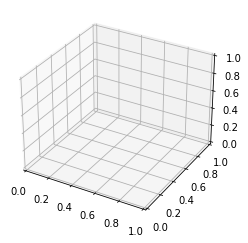

In [14]:


from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')



In [15]:

data5 = data4.copy()
data5 = data5.drop(['Type_of_glass'], axis=1)


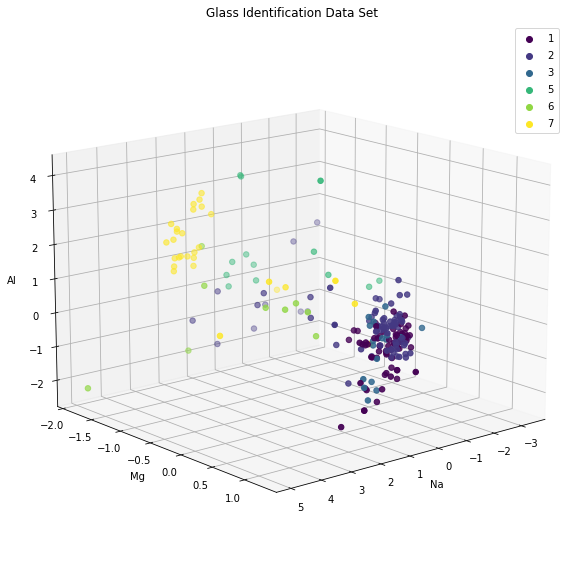

In [16]:

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

xs = data5.Na
ys = data5.Mg
zs = data5.Al
scatter = ax.scatter( xs, ys, zs, c = y, s=30 )
ax.set_xlabel('Na')
ax.set_ylabel('Mg')
ax.set_zlabel('Al')
ax.view_init( azim=50, elev=15 );
ax = plt.title("Glass Identification Data Set")
plt.legend(*scatter.legend_elements())


6.	Разбейте набор данных на обучающую и тестовую выборки. Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 5, определите долю верных ответов на тестовой выборке и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности.

In [17]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data5, y, test_size=0.3, random_state=666)


In [18]:

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=5)  
dt_clf.fit(X_train, y_train);
dt_clf.score(X_test, y_test)


0.6615384615384615

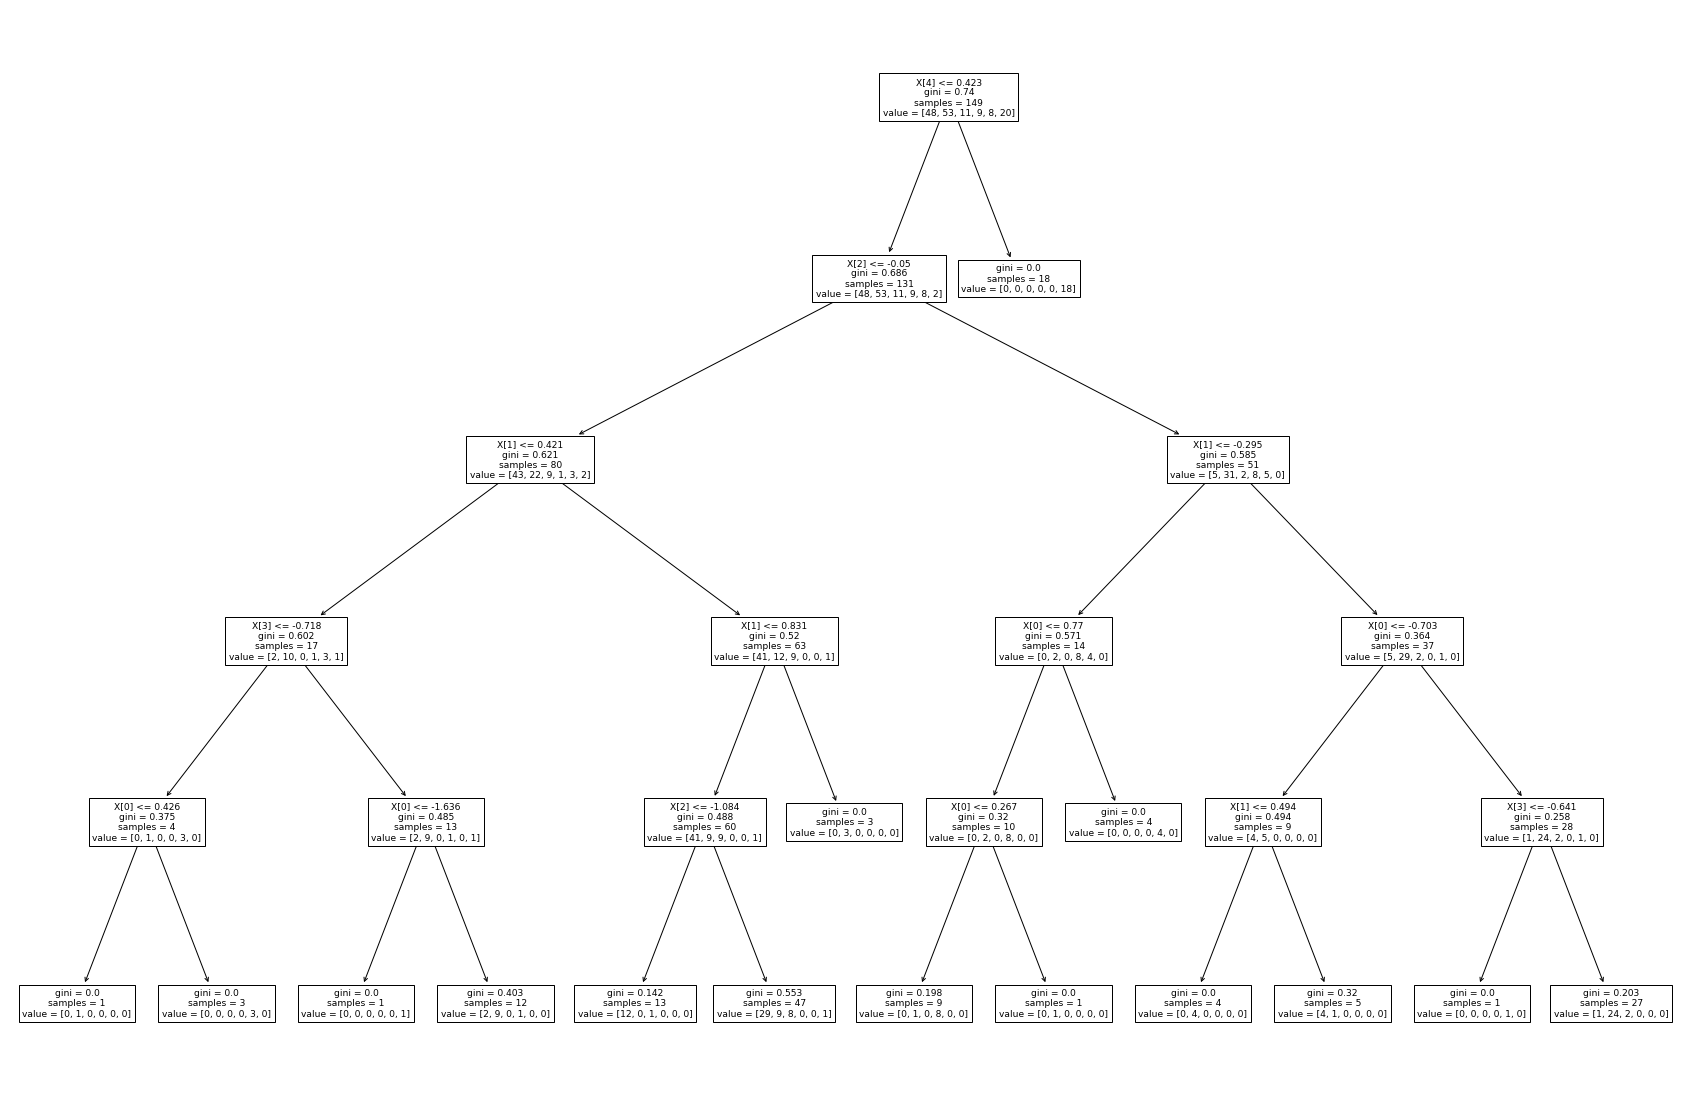

In [19]:

from sklearn.tree import plot_tree
plt.figure(figsize=(30, 20))
plot_tree(dt_clf); 


In [20]:

m1 = np.mean(data5.Al)
m1


-3.4344282350553906e-16

In [21]:

m2 = np.mean(data5.K)
m2


7.470659604954324e-17

In [22]:

m3 = np.mean(data5.Ba)
m3


-1.7639057400586599e-16

In [23]:

def plot_decision_boundary(model, m1, m2, m3, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    
    w, h = x0.shape[0], x0.shape[1]
    x2 = [m1 for _ in range(w*h)]
    x3 = [m2 for _ in range(w*h)]
    x4 = [m3 for _ in range(w*h)]
    X_new = np.c_[x0.ravel(), x1.ravel(), x2, x3, x4]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9', 'r', 'g', 'purple'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    

In [24]:

X6 = data4.copy()
X6 = X6.loc[:,['Na','Mg']]
X6


,Na,Mg
0,0.284953,1.254639
1,0.591817,0.636168
2,0.149933,0.601422
3,-0.242853,0.698710
4,-0.169205,0.650066
...,...,...
209,0.898681,-1.865511
210,1.856097,-1.865511
211,1.168721,-1.865511
212,1.193270,-1.865511


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


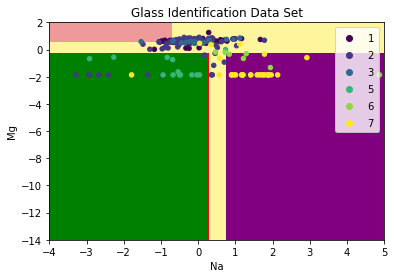

In [25]:

plot_decision_boundary(dt_clf, m1, m2, m3, axis=[-4, 5, -14, 2])
scatter = plt.scatter(X6.Na, X6.Mg, c=y, s=20)

plt.xlabel("Na")
plt.ylabel("Mg")
plt.legend(*scatter.legend_elements())
plt.title("Glass Identification Data Set");


Попробовала больше 5 (лучше не стало):

In [26]:

dt_clf1 = DecisionTreeClassifier(max_depth=6)  
dt_clf1.fit(X_train, y_train);
dt_clf1.score(X_test, y_test)


0.6615384615384615

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


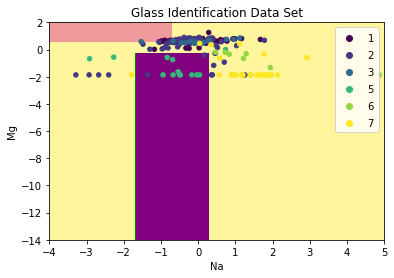

In [27]:

plot_decision_boundary(dt_clf1, m1, m2, m3, axis=[-4, 5, -14, 2])
scatter = plt.scatter(X6.Na, X6.Mg, c=y, s=20)

plt.xlabel("Na")
plt.ylabel("Mg")
plt.legend(*scatter.legend_elements())
plt.title("Glass Identification Data Set");


7. 	Постройте и обучите дополнительные базовые классификаторы, указанные в индивидуальном задании, затем постройте из классификатора дерева решений и дополнительных классификаторов комбинированный классификатор, указанный в индивидуальном задании. Оцените производительность базовых классификаторов и комбинированного классификатора по показателю, указанному в индивидуальном задании. 

Дополнительные базовые классификаторы: 

-            наивный байесовский классификатор 

-            классификатор ближайших соседей (к-во соседей = 5) 

Комбинированный классификатор: VotingClassifier 
Показатель качества модели – F-мера (f1) 

In [28]:

from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train,y_train)
nbc.score(X_test, y_test)


0.46153846153846156

In [29]:

from sklearn.neighbors import KNeighborsClassifier
kNN_clf = KNeighborsClassifier(n_neighbors=5)
kNN_clf.fit(X_train, y_train)
kNN_clf.score(X_test, y_test)


0.7076923076923077

In [30]:

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('nbc', GaussianNB()), 
    ('kNN', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier(random_state=666))],
                             voting='soft')


In [31]:

voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)


0.676923076923077

In [32]:

yhat_nbc = nbc.predict(X_test)


In [33]:

yhat_kNN_clf = kNN_clf.predict(X_test)


In [34]:

yhat_voting_clf = voting_clf.predict(X_test)


In [35]:

from sklearn.metrics import f1_score
f_nbc = f1_score(y_test, yhat_nbc, average=None)
print(f_nbc)
np.average(f_nbc)


[0.58064516 0.12903226 0.         0.4        0.4        0.76190476]


0.37859703020993346

In [36]:

f_kNN = f1_score(y_test, yhat_kNN_clf, average=None)
print(f_kNN)
np.average(f_kNN)


[0.73469388 0.70833333 0.         0.66666667 1.         0.84210526]


0.6586331901181525

In [37]:

f_voting = f1_score(y_test, yhat_voting_clf, average=None)
print(f_voting)
np.average(f_voting)


[0.73913043 0.63829787 0.28571429 0.57142857 0.66666667 0.8       ]


0.616872971822093

Как можно заметить, значение KNeighborsClassifier(5) лучше.

8. 	Постройте и обучите пару ансамблевых классификаторов, указанных в индивидуальном задании, и сравните их производительность по показателю, указанному в индивидуальном задании. 

Ансамблевые классификаторы: RandomForestClassifier,  GradientBoostingClassifier 

In [38]:

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, 
                                random_state=666, n_jobs=-1)
rf_clf.fit(X_train, y_train);


In [39]:

rf_clf.oob_score_


0.7315436241610739

In [40]:

yhat_rf_clf = rf_clf.predict(X_test)


In [41]:

f_rf = f1_score(y_test, yhat_rf_clf, average=None)
print(f_rf)
np.average(f_rf)


[0.66666667 0.76595745 0.25       0.85714286 1.         0.76190476]


0.7169452887537995

In [42]:

from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=30)
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)


0.676923076923077

In [43]:

yhat_gb_clf = gb_clf.predict(X_test)


In [44]:

f_gb = f1_score(y_test, yhat_gb_clf, average=None)
print(f_gb)
np.average(f_gb)


[0.68085106 0.68085106 0.         0.85714286 1.         0.8       ]


0.6698074974670719

Видим, что RandomForestClassifier по показателю f-меры лучше.

9. 	Постройте границы принятия решений ансамблевых классификаторов с визуализацией точек набора данных разных классов разными цветами. Подпишите оси и рисунок. 

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


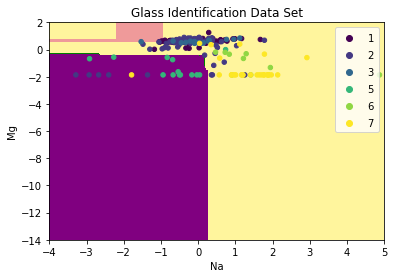

In [45]:

plot_decision_boundary(rf_clf, m1, m2, m3, axis=[-4, 5, -14, 2])
scatter = plt.scatter(X6.Na, X6.Mg, c=y, s=20)

plt.xlabel("Na")
plt.ylabel("Mg")
plt.legend(*scatter.legend_elements())
plt.title("Glass Identification Data Set");


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


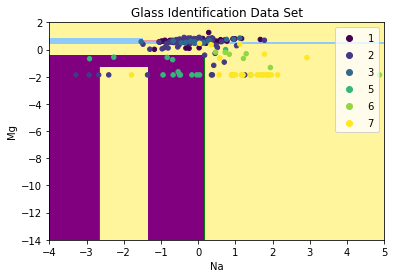

In [46]:

plot_decision_boundary(gb_clf, m1, m2, m3, axis=[-4, 5, -14, 2])
scatter = plt.scatter(X6.Na, X6.Mg, c=y, s=20)

plt.xlabel("Na")
plt.ylabel("Mg")
plt.legend(*scatter.legend_elements())
plt.title("Glass Identification Data Set");
